In [1]:
import numpy as np # 
import pandas as pd # data processing
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\creditcardfraud\creditcard.csv')

In [4]:
#Check any missing/ NaN value
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Due to confidentiality issues, Kaggle doesn’t provide the background information about the 28 features out of 30. The only Features defined are ‘Time’ and ‘Amount’. ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the Transaction Amount. 
‘Class’ is the target variable and it is 1 in case of fraud and 0 otherwise.

Kaggle dosen't provide any information about the 28 ffeatures out of 30, and only 'Time' and 'Amount' are defined. The feature Amount is the Transaction amount, and the feature 'Time' contains the second between each transaction.

In [6]:
#The describe function, is used to view some basic statistical details like percentile, mean, std etc.
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

The ‘Class’ is the target variable and it is 1 as 'max / fraud' and 0 as 'min / otherwise' and 'mean = 0.001727' is almost zero.

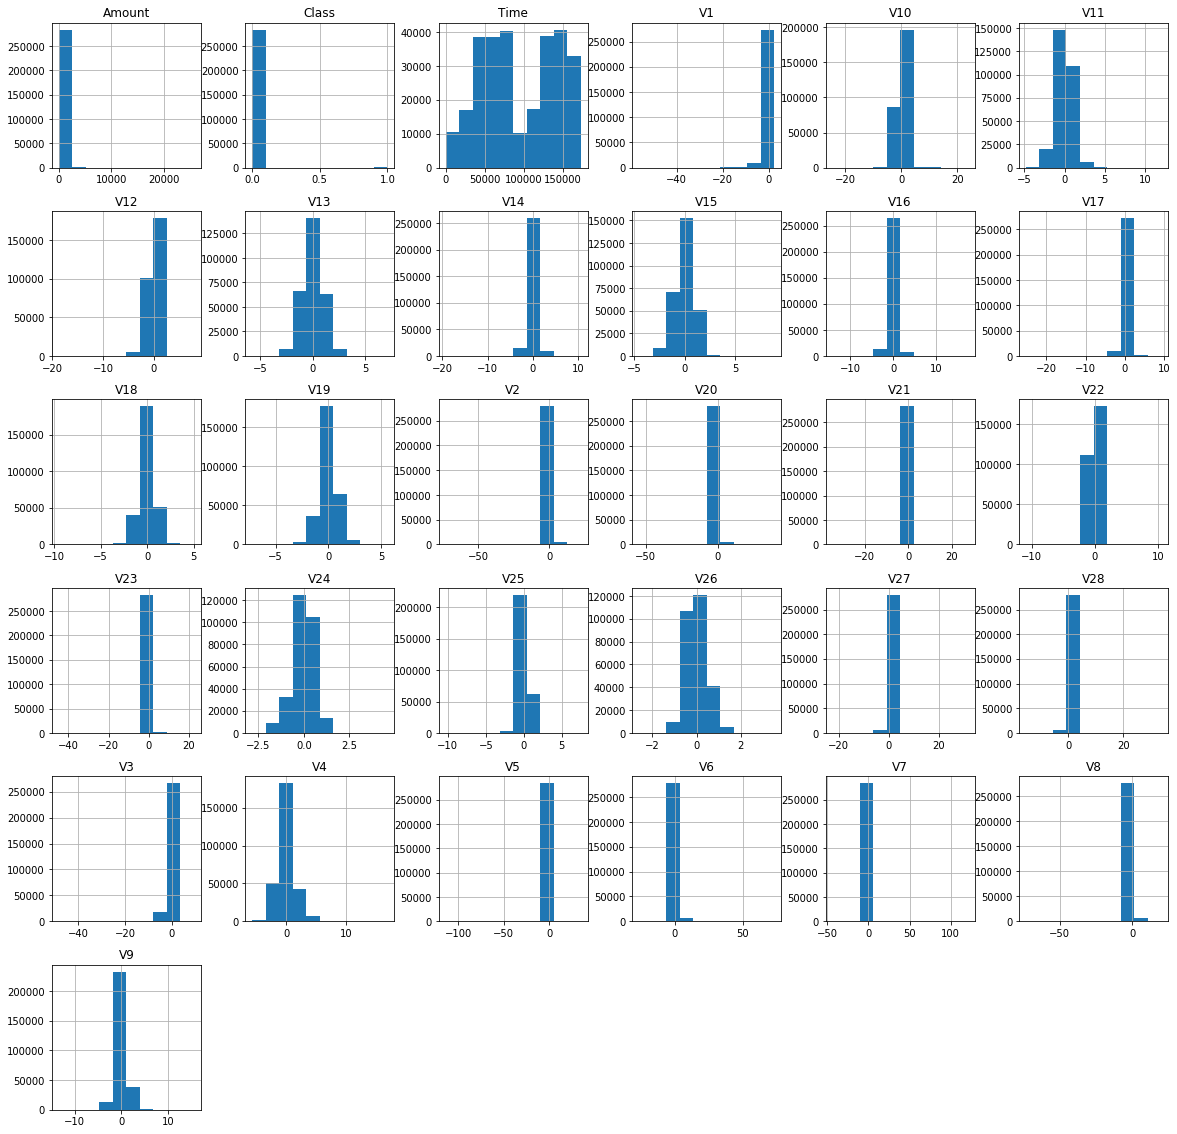

In [7]:
# Check all feature using hist.
df.hist(figsize=(20,20))
plt.show()

Most all features ar clustter around zero, interesting thing 'Class' were there is very few 1 values or fraud transaction.

Class
0    284315
1       492
dtype: int64


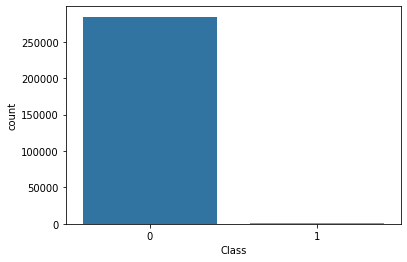

In [8]:
# lets check the 'class' column
sns.countplot("Class",data=df)  # Plot Class 
print(df.groupby('Class').size()) # counts 1's and 0's

From the graph the data is imbalanced.

In [9]:
# now let us check in the number of Percentage
#Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
#Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
normal_transacation = len(df[df["Class"]==0])/(len(df[df["Class"]==0])+len(df[df["Class"]==1]))
print("Normal Transacation:",normal_transacation*100,"%")
fraud_transacation= len(df[df["Class"]==1])/( len(df[df["Class"]==1]) + len(df[df["Class"]==0]))
print("Fraud transacation:",fraud_transacation*100, '%')

Normal Transacation: 99.82725143693798 %
Fraud transacation: 0.1727485630620034 %


There is only 0.17 % are the fraud transcation, and 99.83% normal transcation.

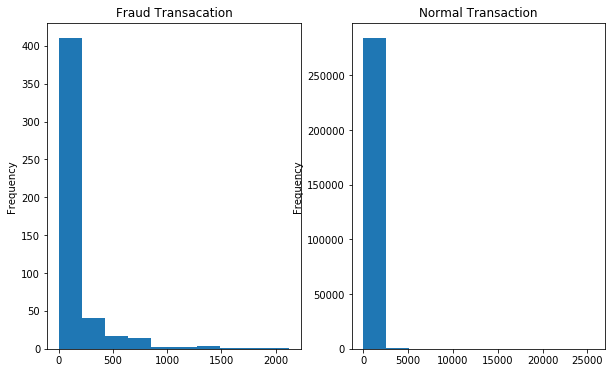

In [10]:
#the 'Amount' related to normal and fraud transcation
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df[df["Class"]==1].Amount.plot.hist(title="Fraud Transacation")
plt.subplot(1,2,2)
df[df["Class"]==0].Amount.plot.hist(title="Normal Transaction")

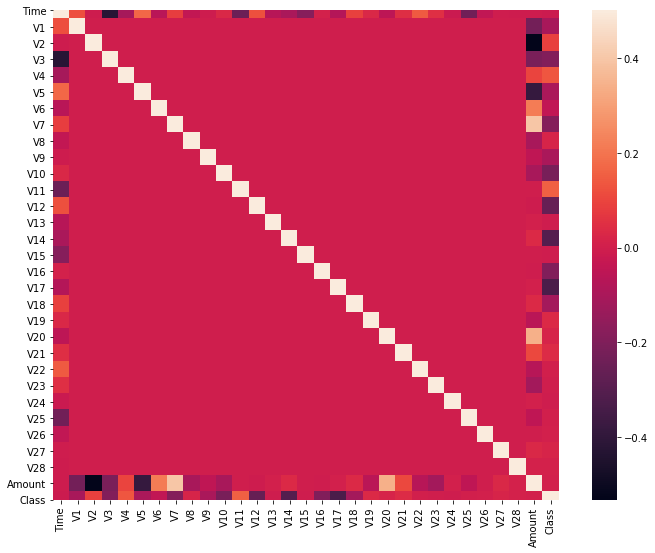

In [11]:
#Let see if there any strong relationship between the V parameters.
# Correlation matrix
corr = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr, vmax = 0.5, square = True)

The dark shades represent positive correlation and lighter shades represent negative correlation

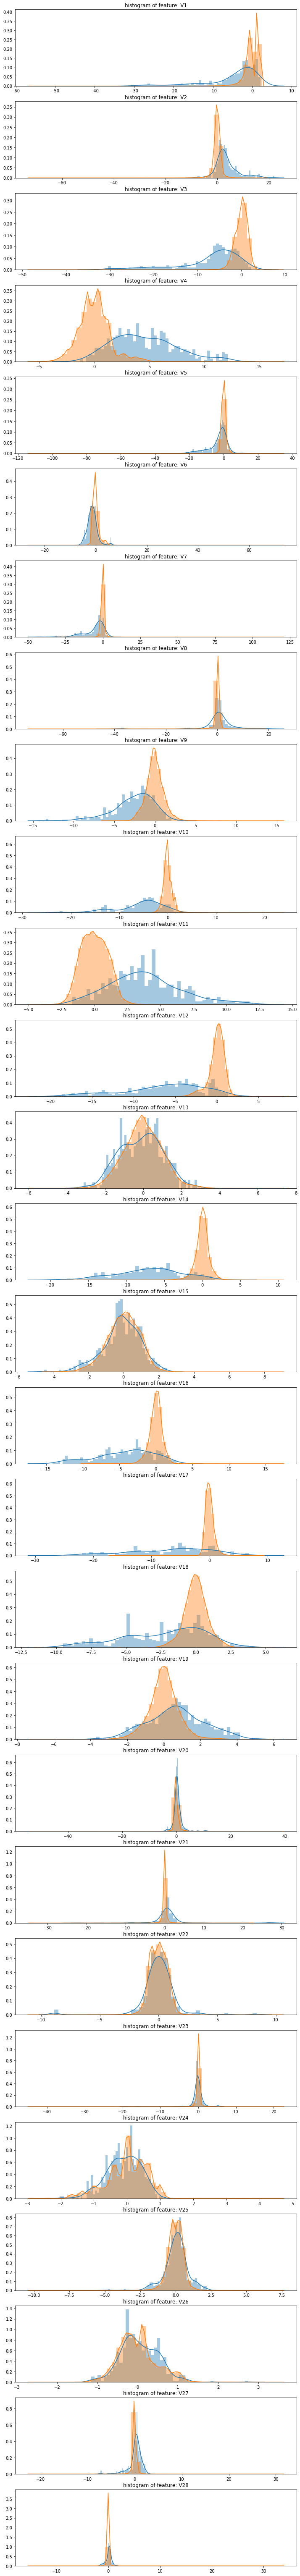

In [18]:
import matplotlib.gridspec as gridspec
# getting all the V features
v_features = df.iloc[:,1:29].columns

#plotting histograms of all v_features (of fraud +normal) to check which of them are useful
# the more diff b/w fraud and normal = more important for learning

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,label="Fraud")
    sns.distplot(df[cn][df.Class == 0], bins=50,label="Normal")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+cn)
plt.show()

# Data preprocessing

In [99]:
#Let drop Time column, since we'll not use in our model
df = df.drop(['Time'], axis =1) 
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
#The input features and the target variable will identify as ‘X’ and ‘y’ for training the model
X = df.iloc[:,df.columns != 'Class']
y = df.iloc[:,df.columns == 'Class']
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [101]:
# Machine learning algorithms can’t estimate correct output without the standard normally distributed data.
# variable are not at the same scale and distribution, We will use StandardScaler function to standardize our data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
#Split the data set using 'train_test_split' function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Machine Learning Model

In [88]:
###### 1 - LogisticRegression

# import LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the model using 'fit' method
lr.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = lr.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

D:\Anaconda3\envs\flask_js\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\flask_js\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.88      0.66      0.75       141

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



Support is showing bad result, we need to evaluating our machine learning model

In [90]:
# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred.round()))


[[85289    13]
 [   48    93]]


From confusing matrix, we predict 48 that are normal transaction, but on the test are fraud transaction( False Positive), even scroe almot 99% but still not accurate. We need to find another way to handle with unbalanced data.

In [81]:
########################## 
#   2 - Random Forest
#########################

from sklearn.ensemble import RandomForestClassifier
# train model
rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
# predict on test set
rfc_pred = rfc.predict(X_test)    


D:\Anaconda3\envs\flask_js\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [91]:
print(confusion_matrix(y_test, rfc_pred.round()))

[[85299     3]
 [   32   109]]


32 False Positive, which better then LogisticRegression

# Approach to handling Imbalanced Datasets

# Sampling

In [107]:
########################## 
#  1 - oversampling 
#########################
#Oversampling can be a good choice when you don’t have a lot of data to work with.

#import resampling 
from sklearn.utils import resample


#Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    199031
0    199031
Name: Class, dtype: int64

After resampling it is showing an equal ratio of data points for each class

In [125]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)
upsampled_lr = LogisticRegression().fit(X_train, y_train)
upsampled_pred = upsampled_lr.predict(X_test)

D:\Anaconda3\envs\flask_js\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
print(confusion_matrix(y_test, upsampled_pred.round()))

[[83181  2103]
 [   16   143]]


Better then before with 16 FP.
We can used undersampling but data not that big, better to avoid undersampling

In [132]:
# trying Random Forest
upsampled_rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
# predict on test set
upsampled_pred_rfc = upsampled_rfc.predict(X_test)  

In [133]:
print(confusion_matrix(y_test, upsampled_pred_rfc.round()))

[[85277     7]
 [   40   119]]


# Informed Over Sampling: Synthetic Minority Over-sampling Technique

In [137]:
#Import SMOTE 
from imblearn.over_sampling import SMOTE

In [139]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [140]:
# trying logistic regression again with the balanced dataset
smote_lr = LogisticRegression().fit(X_train, y_train)
smote_pred_lr = smote_lr.predict(X_test)

D:\Anaconda3\envs\flask_js\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [141]:
print(confusion_matrix(y_test, smote_pred_lr.round()))

[[69828  1242]
 [   16   116]]


In [143]:
# trying Random Forest
smote_rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
# predict on test set
smote_pred_rfc = smote_rfc.predict(X_test) 

In [144]:
print(confusion_matrix(y_test, smote_pred_rfc.round()))

[[71052    18]
 [   23   109]]
